<h1 align="center">Advanced Image Processing and Analysis</h1>
<h3 align="center">ECE 4438B/ECE 9022/ECE 9202B/BIOMED 9519B/BIOPHYS 9519B/CAMI 9519B</h3>
<h4 align="center"><a href="mailto:echen29@uwo.ca"> Elvis Chen, PhD, LL</a></h4>
<h4 align="center">Robarts Research Institute, London</h4>
<h4 align="center">Department of Electrical and Computer Engineering, Western University</h4>
<h4 align="center">School of Biomedical Engineering, Western University</h4>
<h4 align="center">Department of Medical Biophysics, Western University</h4>
<h4 align="center">Day 04, January 15, 2019</h4>

#### Introduction
So far, we have gone through image presentation within the SimpleITK environment:
* asseccors for the `Image` class
* direct pixel/voxel manipulations
* created our first SimpleITK Image
* visualize/display

We now look into some of the more advanced functions to do things faster.

In [1]:
from __future__ import print_function
import SimpleITK as sitk

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
%matplotlib inline
import numpy as np

from ipywidgets import interact, fixed
import os

OUTPUT_DIR = 'Output'

# Download data to work on

# Utility method that either downloads data from the MIDAS repository or
# if already downloaded returns the file name for reading from disk (cached data).
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

By now, we should know what does the above lines mean.

Let us begin by developing a convenient method for displaying images in our notebooks.

In [2]:
# create a Gaussian filter (image).
#
# remember what convolution is from the previous course ECE 4445A?
img = sitk.GaussianSource(size=[64]*2)
help(sitk.GaussianSource)

Help on function GaussianSource in module SimpleITK.SimpleITK:

GaussianSource(*args, **kwargs)
    GaussianSource(itk::simple::PixelIDValueEnum outputPixelType, VectorUInt32 size, VectorDouble sigma, VectorDouble mean, double scale=255, VectorDouble origin, VectorDouble spacing, VectorDouble direction, bool normalized=False) -> Image
    
    
    
    Generate an n-dimensional image of a Gaussian.
    
    
    This function directly calls the execute method of GaussianImageSource in order to support a procedural API
    
    
    See:
     itk::simple::GaussianImageSource for the object oriented interface



In [3]:
# some python syntax: What does the following mean?
[64]*2

[64, 64]

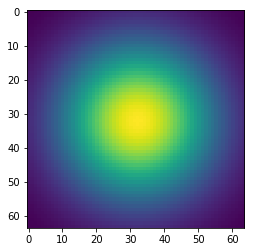

In [4]:
plt.imshow(sitk.GetArrayViewFromImage(img))
# remember what GetArrayViewFromImage vs. GetArrayFromImage?

That is, instead of looking at the numerical value of the `array`, we visualize it as an image

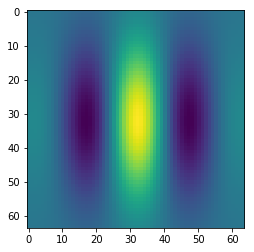

In [6]:
img = sitk.GaborSource(size=[64]*2, frequency=.03)
plt.imshow(sitk.GetArrayViewFromImage(img))

here, we created a Gabor source. Don't worry about that it does too much (just yet).

We can define a simple python function to facilitate this process

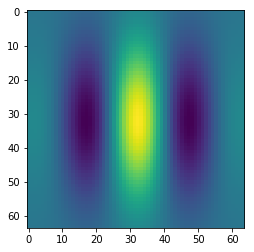

In [7]:
def myshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)
myshow(img)

## Multi-dimension slice indexing

If you are familiar with numpy, sliced index then this should be cake for the SimpleITK image. The Python standard slice interface for 1-D object:

<table>
    <tr><td>Operation</td>	<td>Result</td></tr>
    <tr><td>d[i]</td>	<td>i-th item of d, starting index 0</td></tr>
    <tr><td>d[i:j]</td>	<td>slice of d from i to j</td></tr>
    <tr><td>d[i:j:k]</td>	<td>slice of d from i to j with step k</td></tr>
</table>

With this convenient syntax many basic tasks can be easily done.

In [8]:
img[24,24] # what does this do?  We have used it before

0.048901304602622986

In [9]:
### Cropping

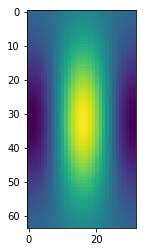

In [10]:
myshow(img[16:48,:])

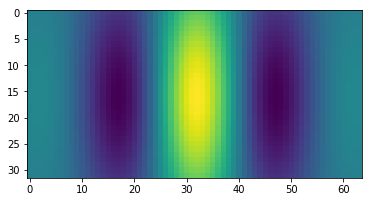

In [11]:
myshow(img[:,16:-16]) # what does negative (-) index mean?

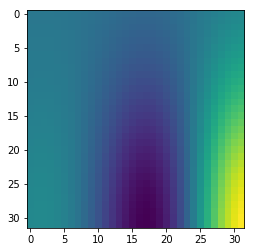

In [12]:
myshow(img[:32,:32]) # default value for missing index?

### Flipping

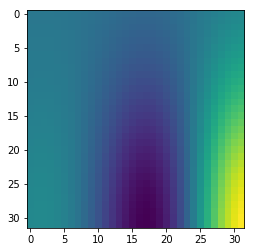

In [13]:
img_corner = img[:32,:32]
myshow(img_corner)

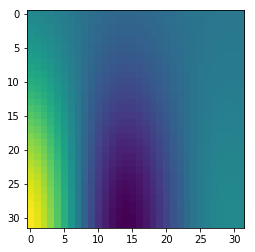

In [14]:
myshow(img_corner[::-1,:])

To understand the slicing operation, use the following trivial example:

In [15]:
a=[1,2,3,4,5]

In [16]:
print(a[:])
print(a[:-1])
print(a[::])
print(a[::-1])

[1, 2, 3, 4, 5]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[5, 4, 3, 2, 1]


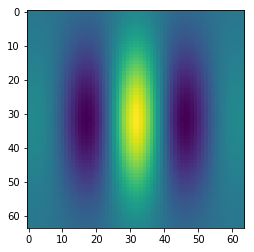

In [17]:
myshow(sitk.Tile(img_corner, img_corner[::-1,::],img_corner[::,::-1],img_corner[::-1,::-1], [2,2]))

In [18]:
help(sitk.Tile)

Help on function Tile in module SimpleITK.SimpleITK:

Tile(*args)
    Tile(VectorOfImage images, VectorUInt32 layout, double defaultPixelValue=0.0) -> Image
    Tile(Image image1, VectorUInt32 layout, double defaultPixelValue=0.0) -> Image
    Tile(Image image1, Image image2, VectorUInt32 layout, double defaultPixelValue=0.0) -> Image
    Tile(Image image1, Image image2, Image image3, VectorUInt32 layout, double defaultPixelValue=0.0) -> Image
    Tile(Image image1, Image image2, Image image3, Image image4, VectorUInt32 layout, double defaultPixelValue=0.0) -> Image
    Tile(Image image1, Image image2, Image image3, Image image4, Image image5, VectorUInt32 layout, double defaultPixelValue=0.0) -> Image



### Slice Extraction

A 2D image can be extracted from a 3D one.

In [24]:
# 3D volume example
vol = sitk.ReadImage('../Data/fib_sem_bacillus_subtilis.mha')

RuntimeError: Exception thrown in SimpleITK ReadImage: /Users/blowekamp/miniconda2/conda-bld/simpleitk_1546547416787/work/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "../Data/fib_sem_bacillus_subtilis.mha" does not exist.

In [ ]:
vol.GetSize()

In [ ]:
myshow(vol[:,:,125])

In [ ]:
myshow(vol[256,:,:])

### Subsampling

In [ ]:
myshow(vol[:,::3,125])

## Mathematical Operators

Most python mathematical operators are overloaded to call the SimpleITK filter which does that same operation on a per-pixel basis. They can operate on a two images or an image and a scalar.

If two images are used then both must have the same pixel type. The output image type is usually the same.

As these operators basically call ITK filter, which just use raw C++ operators, care must be taken to prevent overflow, and divide by zero etc.

<table>
    <tr><td>Operators</td></tr>
    <tr><td>+</td></tr>
    <tr><td>-</td></tr>
    <tr><td>&#42;</td></tr>
    <tr><td>/</td></tr>
    <tr><td>//</td></tr>
    <tr><td>**</td></tr>
</table>

In [ ]:
img = sitk.ReadImage(fdata("cthead1.png"))
img = sitk.Cast(img,sitk.sitkFloat32)
myshow(img)
img[150,150]

Remember what was the original data type for `cthead.png`?

What does `sitk.Cast` do, and why?

In [ ]:
timg = img**2
myshow(timg)
timg[150,150]

### Division Operators

All three Python division operators are implemented `__floordiv__`, `__truediv__`, and `__div__`.

The true division's output is a double pixel type.

See [PEP 238](https://www.python.org/dev/peps/pep-0238/) to see why Python changed the division operator in Python 3.

### Bitwise Logic Operators

<table>
    <tr><td>Operators</td></tr>
    <tr><td>&</td></tr>
    <tr><td>|</td></tr>
    <tr><td>^</td></tr>
    <tr><td>~</td></tr>
</table>

In [ ]:
img = sitk.ReadImage(fdata("cthead1.png"))
myshow(img)

## Comparative Operators
<table>
    <tr><td>Operators</td></tr>
    <tr><td>&gt;</td></tr>
    <tr><td>&gt;=</td></tr>
    <tr><td>&lt;</td></tr>
    <tr><td>&lt;=</td></tr>
    <tr><td>==</td></tr>
</table>

These comparative operators follow the same convention as the reset of SimpleITK for binary images. They have the pixel type of ``sitkUInt8`` with values of 0 and 1.

### Amazingly make common trivial tasks really trivial

In [ ]:
myshow(img>90)

In [ ]:
myshow(img>150)

In [ ]:
myshow((img>90)+(img>150))

# More on imaging operations

## Accessing Pixels and Slicing

The Image class's member functions ``GetPixel`` and ``SetPixel`` provide an ITK-like interface for pixel access.

In [ ]:
help(vol.GetPixel)

In [ ]:
print(vol.GetPixel(0, 0, 0))
vol.SetPixel(0, 0, 0, 1)
print(vol.GetPixel(0, 0, 0))

In [ ]:
# the same operation can also be done using pythong notation
print(vol[0, 0, 0])
vol[0, 0, 0] = 0
print(vol[0, 0, 0])
print(vol.GetPixel(0, 0, 0))

Slicing of SimpleITK images **returns a copy of the image data**. 

This is similar to slicing Python lists and differs from the "view" returned by slicing numpy arrays. 

In [ ]:
logo = sitk.ReadImage(fdata('SimpleITK.jpg'))
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

In [ ]:
# Brute force sub-sampling 
logo_subsampled = logo[::2,::2]

# Get the sub-image containing the word Simple
simple = logo[0:115,:]

# Get the sub-image containing the word Simple and flip it
simple_flipped = logo[115:0:-1,:]

n = 4

plt.subplot(n,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

plt.subplot(n,1,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled))
plt.axis('off');

plt.subplot(n,1,3)
plt.imshow(sitk.GetArrayViewFromImage(simple))
plt.axis('off')

plt.subplot(n,1,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped))
plt.axis('off');

Draw a square on top of the logo image:
After running this cell, uncomment "Version 3" and see its effect.

In [ ]:
# Version 0: get the numpy array and assign the value via broadcast - later on you will need to construct 
# a new image from the array 
logo_pixels = sitk.GetArrayFromImage(logo)
logo_pixels[0:10,0:10] = [0,255,0]

# Version 1: generates an error, the image slicing returns a new image and you cannot assign a value to an image 
#logo[0:10,0:10] = [255,0,0]

# Version 2: image slicing returns a new image, so all assignments here will not have any effect on the original
# 'logo' image
logo_subimage = logo[0:10, 0:10]
for x in range(0,10):
    for y in range(0,10):
        logo_subimage[x,y] = [255,0,0]

# Version 3: modify the original image, iterate and assign a value to each pixel
#for x in range(0,10):
#    for y in range(0,10):
#        logo[x,y] = [255,0,0]

        
plt.subplot(2,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(logo_pixels)
plt.axis('off');

**Question**: subplot?

**Question**: what does the code `logo_pixels[0:10,0:10] = [0,255,0]` do?

In [ ]:
print(logo.GetNumberOfComponentsPerPixel())

In [ ]:
# Version 3: modify the original image, iterate and assign a value to each pixel
for x in range(0,10):
    for y in range(0,10):
        logo[x,y] = [255,0,0]

        
plt.subplot(3,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off')

plt.subplot(3,1,2)
plt.imshow(logo_pixels)
plt.axis('off');

## Conversion between numpy and SimpleITK

SimpleITK and numpy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### From SimpleITK to numpy

We have two options for converting from SimpleITK to numpy:
* GetArrayFromImage(): returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
* GetArrayViewFromImage(): returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and __the view will be invalid if the original SimpleITK image is deleted__.

In [ ]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)

nda = sitk.GetArrayFromImage(image_3D)
print(image_3D.GetSize())
print(nda.shape)

In [ ]:
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)
nda = sitk.GetArrayFromImage(image_RGB)
print(image_RGB.GetSize())
print(nda.shape)

In [ ]:
gabor_image = sitk.GaborSource(size=[64,64], frequency=.03)
# Getting a numpy array view on the image data doesn't copy the data
nda_view = sitk.GetArrayViewFromImage(gabor_image)
plt.imshow(nda_view, cmap=plt.cm.Greys_r)
plt.axis('off');

# Trying to assign a value to the array view will throw an exception
nda_view[0,0] = 255

### From numpy to SimpleITK

Remember to to set the image's origin, spacing, and possibly direction cosine matrix. The default values may not match the physical dimensions of your image.

In [ ]:
nda = np.zeros((10,20,3))

        #if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())

      #if this is supposed to be a 2D color image [x=20,y=10]
img = sitk.GetImageFromArray(nda, isVector=True)
print(img.GetSize())

### Image operations

SimpleITK supports basic arithmetic operations between images, <b>taking into account their physical space</b>.

Repeatedly run this cell. Fix the error (comment out the SetDirection, then SetSpacing). Why doesn't the SetOrigin line cause a problem? How close do two physical attributes need to be in order to be considered equivalent?

In [ ]:
img1 = sitk.Image(24,24, sitk.sitkUInt8)
img1[0,0] = 0

img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
img2.SetDirection([0,1,0.5,0.5])
img2.SetSpacing([0.5,0.8])
img2.SetOrigin([0.000001,0.000001])
img2[0,0] = 255

img3 = img1 + img2
print(img3[0,0])

In [ ]:
print(img1.GetDirection())

## Reading and Writing

SimpleITK can read and write images stored in a single file, or a set of files (e.g. DICOM series).

Images stored in the DICOM format have a meta-data dictionary associated with them, which is populated with the DICOM tags. When a DICOM series is read as a single image, the meta-data information is not available since DICOM tags are specific to a file. If you need the meta-data, access the dictionary for each file by reading them separately. 

In the following cell, we read an image in JPEG format, and write it as PNG and BMP. File formats are deduced from the file extension. Appropriate pixel type is also set - you can override this and force a pixel type of your choice.

In [ ]:
img = sitk.ReadImage(fdata('SimpleITK.jpg'))
print(img.GetPixelIDTypeAsString())

# write as PNG and BMP
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.bmp'))

Read an image in JPEG format and cast the pixel type according to user selection.

In [ ]:
# Several pixel types, some make sense in this case (vector types) and some are just show
# that the user's choice will force the pixel type even when it doesn't make sense.
pixel_types = { 'sitkUInt8': sitk.sitkUInt8,
                'sitkUInt16' : sitk.sitkUInt16,
                'sitkFloat64' : sitk.sitkFloat64,
                'sitkVectorUInt8' : sitk.sitkVectorUInt8,
                'sitkVectorUInt16' : sitk.sitkVectorUInt16,
                'sitkVectorFloat64' : sitk.sitkVectorFloat64}

def pixel_type_dropdown_callback(pixel_type, pixel_types_dict):
    #specify the file location and the pixel type we want
    img = sitk.ReadImage(fdata('SimpleITK.jpg'), pixel_types_dict[pixel_type])
    
    print(img.GetPixelIDTypeAsString())
    print(img[0,0])
    plt.imshow(sitk.GetArrayViewFromImage(img))
    plt.axis('off')
 
interact(pixel_type_dropdown_callback, pixel_type=list(pixel_types.keys()), pixel_types_dict=fixed(pixel_types));  

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
series_ID = '1.2.840.113619.2.290.3.3233817346.783.1399004564.515'

# Get the list of files belonging to a specific series ID.
reader = sitk.ImageSeriesReader()
# Use the functional interface to read the image series.
original_image = sitk.ReadImage(reader.GetGDCMSeriesFileNames(data_directory, series_ID))

# Write the image.
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

# Read it back again.
written_image = sitk.ReadImage(output_file_name_3D)

# Check that the original and written image are the same.
statistics_image_filter = sitk.StatisticsImageFilter()
statistics_image_filter.Execute(original_image - written_image)

# Check that the original and written files are the same
print('Max, Min differences are : {0}, {1}'.format(statistics_image_filter.GetMaximum(), statistics_image_filter.GetMinimum()))

Write an image series as JPEG. The WriteImage function receives a volume and a list of images names and writes the volume according to the z axis. For a displayable result we need to rescale the image intensities (default is [0,255]) since the JPEG format requires a cast to the UInt8 pixel type.

In [ ]:
sitk.WriteImage(sitk.Cast(sitk.RescaleIntensity(written_image), sitk.sitkUInt8), 
                [os.path.join(OUTPUT_DIR, 'slice{0:03d}.jpg'.format(i)) for i in range(written_image.GetSize()[2])]) 

Select a specific DICOM series from a directory and only then load user selection.

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
# Global variable 'selected_series' is updated by the interact function
selected_series = ''
def DICOM_series_dropdown_callback(series_to_load, series_dictionary):
    global selected_series
               # Print some information about the series from the meta-data dictionary
               # DICOM standard part 6, Data Dictionary: http://medical.nema.org/medical/dicom/current/output/pdf/part06.pdf
    img = sitk.ReadImage(series_dictionary[series_to_load][0])
    tags_to_print = {'0010|0010': 'Patient name: ', 
                     '0008|0060' : 'Modality: ',
                     '0008|0021' : 'Series date: ',
                     '0008|0080' : 'Institution name: ',
                     '0008|1050' : 'Performing physician\'s name: '}
    for tag in tags_to_print:
        try:
            print(tags_to_print[tag] + img.GetMetaData(tag))
        except: # Ignore if the tag isn't in the dictionary
            pass
    selected_series = series_to_load                    

# Directory contains multiple DICOM studies/series, store
             # in dictionary with key being the series ID
reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(data_directory)
            # Check that we have at least one series
if series_IDs:
    for series in series_IDs:
        series_file_names[series] = reader.GetGDCMSeriesFileNames(data_directory, series)
    
    interact(DICOM_series_dropdown_callback, series_to_load=list(series_IDs), series_dictionary=fixed(series_file_names)); 
else:
    print('Data directory does not contain any DICOM series.')

In [ ]:
reader.SetFileNames(series_file_names[selected_series])
img = reader.Execute()
# Display the image slice from the middle of the stack, z axis
z = int(img.GetDepth()/2)
plt.imshow(sitk.GetArrayViewFromImage(img)[z,:,:], cmap=plt.cm.Greys_r)
plt.axis('off');

## Image Display

While SimpleITK does not do visualization, it does contain a built in ``Show`` method. This function writes the image out to disk and than launches a program for visualization. By default it is configured to use <a href="http://imagej.nih.gov/ij/">ImageJ</a>, because it readily supports many medical image formats and loads quickly. However, the ``Show`` visualization program is easily customizable by an environment variable:

<ul>
<li>SITK_SHOW_COMMAND: Viewer to use (<a href="http://www.itksnap.org">ITK-SNAP</a>, <a href="http://www.slicer.org">3D Slicer</a>...) </li>
<li>SITK_SHOW_COLOR_COMMAND: Viewer to use when displaying color images.</li>
<li>SITK_SHOW_3D_COMMAND: Viewer to use for 3D images.</li>
</ul>

In [ ]:
sitk.Show?

By converting into a numpy array, matplotlib can be used for visualization for integration into the scientific python environment. This is good for illustrative purposes, but is problematic when working with images that have a high dynamic range or non-isotropic spacing - most 3D medical images. 

When working with medical images it is recommended to visualize them using dedicated software such as the freely available 3D Slicer or ITK-SNAP.

In [ ]:
mr_image = sitk.ReadImage(fdata('training_001_mr_T1.mha'))
npa = sitk.GetArrayViewFromImage(mr_image)

# Display the image slice from the middle of the stack, z axis
z = int(mr_image.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(mr_image)[z,:,:]

# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure()
fig.set_size_inches(15,30)

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)
plt.title('default colormap')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r);
plt.title('grey colormap')
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values')
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis('off');

In [ ]:
# Display the image slice in the middle of the stack, x axis
    
x = int(mr_image.GetWidth()/2)

npa_xslice = npa[:,:,x]
plt.imshow(npa_xslice, cmap=plt.cm.Greys_r)
plt.axis('off')

print('Image spacing: {0}'.format(mr_image.GetSpacing()))

In [ ]:
# Collapse along the x axis
extractSliceFilter = sitk.ExtractImageFilter()     
size = list(mr_image.GetSize())
size[0] = 0
extractSliceFilter.SetSize( size )
         
index = (x, 0, 0)
extractSliceFilter.SetIndex(index)
sitk_xslice = extractSliceFilter.Execute(mr_image)

# Resample slice to isotropic
original_spacing = sitk_xslice.GetSpacing()
original_size = sitk_xslice.GetSize()

min_spacing = min(sitk_xslice.GetSpacing())
new_spacing = [min_spacing, min_spacing]
new_size = [int(round(original_size[0]*(original_spacing[0]/min_spacing))), 
            int(round(original_size[1]*(original_spacing[1]/min_spacing)))]
resampleSliceFilter = sitk.ResampleImageFilter()

# Why is the image pixelated?
sitk_isotropic_xslice = resampleSliceFilter.Execute(sitk_xslice, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, sitk_xslice.GetOrigin(),
                                                    new_spacing, sitk_xslice.GetDirection(), 0, sitk_xslice.GetPixelID())

plt.imshow(sitk.GetArrayViewFromImage(sitk_isotropic_xslice), cmap=plt.cm.Greys_r)
plt.axis('off')
print('Image spacing: {0}'.format(sitk_isotropic_xslice.GetSpacing()))

So if you really want to look at your images, use the sitk.Show command:

In [ ]:
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

Use a different viewer by setting environment variable(s). Do this from within your Jupyter notebook using 'magic' functions, or set in a more permanent manner using your OS specific convention. 

[**ITK_SNAP**](http://www.itksnap.org/pmwiki/pmwiki.php) is an open-source software application used to segment structures in 3D medical images. It provides semi-automatic segmentation using active contour methods, as well as manual delineation and image navigation. In addition to these core functions, ITK-SNAP offers many supporting utilities. Some of the core advantages of ITK-SNAP include:
* Linked cursor for seamless 3D navigation
* Manual segmentation in three orthogonal planes at once
* A modern graphical user interface based on Qt
* Support for many different 3D image formats, including NIfTI and DICOM
* Support for concurrent, linked viewing, and segmentation of multiple images
* Support for color, multi-channel, and time-variant images
* 3D cut-plane tool for fast post-processing of segmentation results
* Extensive tutorial and video documentation

There are many functionalities in ITK-SNAP, focused specifically on the problem of image segmentation. We can use it as a GUI for visualizing image processing results.

In [ ]:
%env SITK_SHOW_COMMAND /Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP 

try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ITK-SNAP not installed or ' +
          'environment variable pointing to non existant viewer).')

[**ImageJ**](https://imagej.nih.gov/ij/) is a public domain Java image processing program. I can run as an online applet or as a downloadable application. It can support many image formats that are common to SimpleITK. We use it as a default viewer for this course.

In [ ]:
%env SITK_SHOW_COMMAND '/Applications/ImageJ/ImageJ.app/Contents/MacOS/JavaApplicationStub'
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

[**3D Slicer**](https://www.slicer.org/) is an open source software platform for medical image informatics, image processing, and three-dimensional visualization. It has many `modules`, capable of performing many tasks. It builts on top of [ITK](https://itk.org/) (for image processing and analysis) and [VTK](https://www.vtk.org/) (for visualization). It is the `Swiss Army knife`. 

This is the platform this course used for the previous years. You can use 3D Slicer for visualization purposes. To work in it requires some (not-so-trivial) programming knowledge.

In [ ]:
%env SITK_SHOW_COMMAND '/Applications/Slicer.app/Contents/MacOS/Slicer'
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (Slicer not installed or ' +
          'environment variable pointing to non existant viewer).')